<a href="https://colab.research.google.com/github/harsh15998/classification/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Libraries for data manipulation
import pandas as pd
import numpy as np
#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
from wordcloud import WordCloud
#Libraries to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
tweets_df = pd.read_csv("/content/drive/MyDrive/classification/Coronavirus Tweets.csv", encoding='latin-1')

In [4]:
#Creating a copy of the dataset
df=tweets_df.copy()

In [5]:
#first look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
#Checking basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [7]:
#Checking the shape of the dataset
print("The dataset contains",df.shape[0],"rows")
print("The dataset contains",df.shape[1],"columns")

The dataset contains 41157 rows
The dataset contains 6 columns


In [8]:
#Checking for duplicates
print("The number of duplicates are:",len(df[df.duplicated()]))

The number of duplicates are: 0


In [9]:
#Getting the count of null values in all the columns
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

We can observe that only the column 'Location' contains null values. But we are not considering that column for sentiment analysis. Hence there is no need for null value treatment.


Let's create a word cloud showing the different variables in the given dataset.

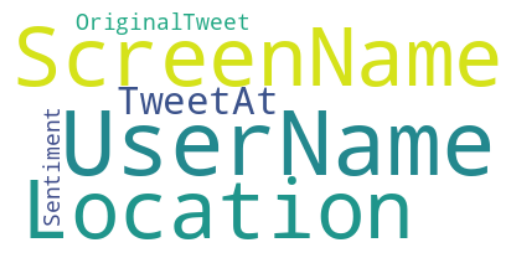

In [10]:
text1 = " ".join(title for title in df.columns)
# Creating word_cloud with text as argument in .generate() method
word_cloud1 = WordCloud(collocations = False, background_color = 'white').generate(text1)
# Display the generated Word Cloud
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
#Unique number of values in each column
df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

It is clear that screenName and UserName are unique for each observation in the given dataset. Therefore we will remove them.

In [12]:
#Drop UserName and ScreenName
df.drop(["UserName","ScreenName"],axis=1,inplace=True)

Target variable analysis

Now, let's analyze the target variable, Sentiment

In [13]:
#Checking subcategories of target variable
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

We ave 5 subcategories for Sentiment- 'Neutral', 'Positive', 'Extremely Negative', 'Negative' and 'Extremely Positive'

In [14]:
#number of tweets in each subcategory of target variable
df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Number of tweets')

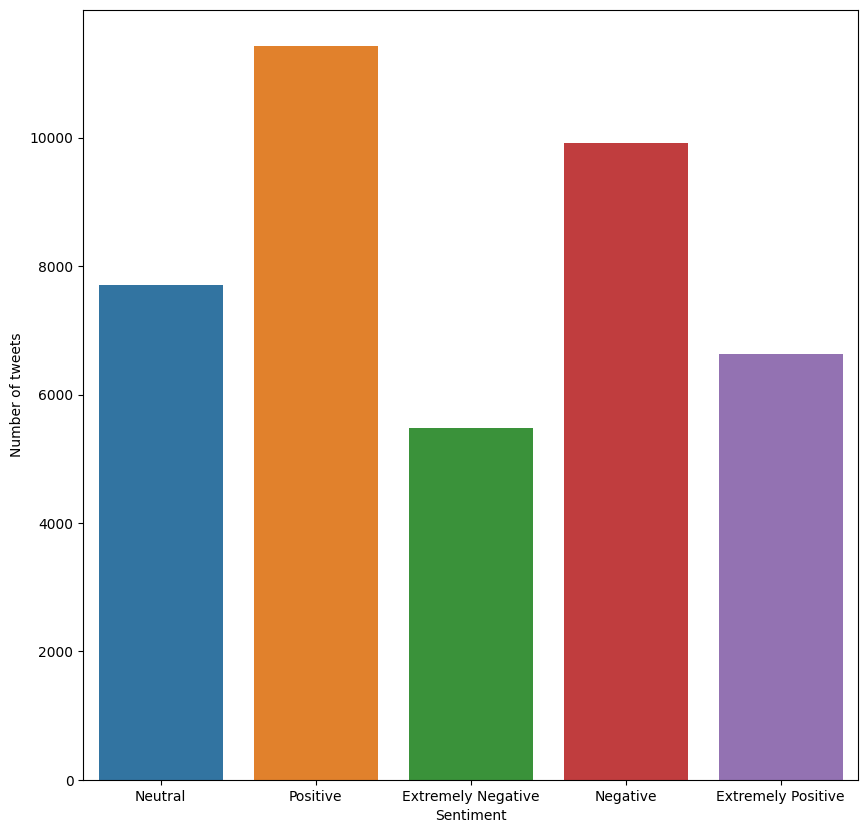

In [15]:
#Setting the heigt and width of the graph
plt.rcParams["figure.figsize"]=10,10
#Plotting the total number of tweets for each subcategory in the target variable
sns.countplot(x="Sentiment", data=df)
plt.ylabel("Number of tweets")

Converting Sentiment

We will convert this 5-class classification problem into a 3-class classification problem by merging Extremely Positive tweets with positive tweets and Extremely Negative tweets with negative tweets.

In [16]:
def Sentiment_Grouping(sentiment):
  if sentiment == "Extremely Positive":
    return "Positive"
  elif sentiment == "Extremely Negative":
    return "Negative"
  else:
    return sentiment

In [17]:
#Apply the Sentiment_Grouping function on the Sentiment column
df["Sentiment"] = df["Sentiment"].apply(Sentiment_Grouping)

In [18]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

The types of sentiments after grouping are:

1.Neutral

2.Positive


3.Negative


<Axes: xlabel='Sentiment', ylabel='count'>

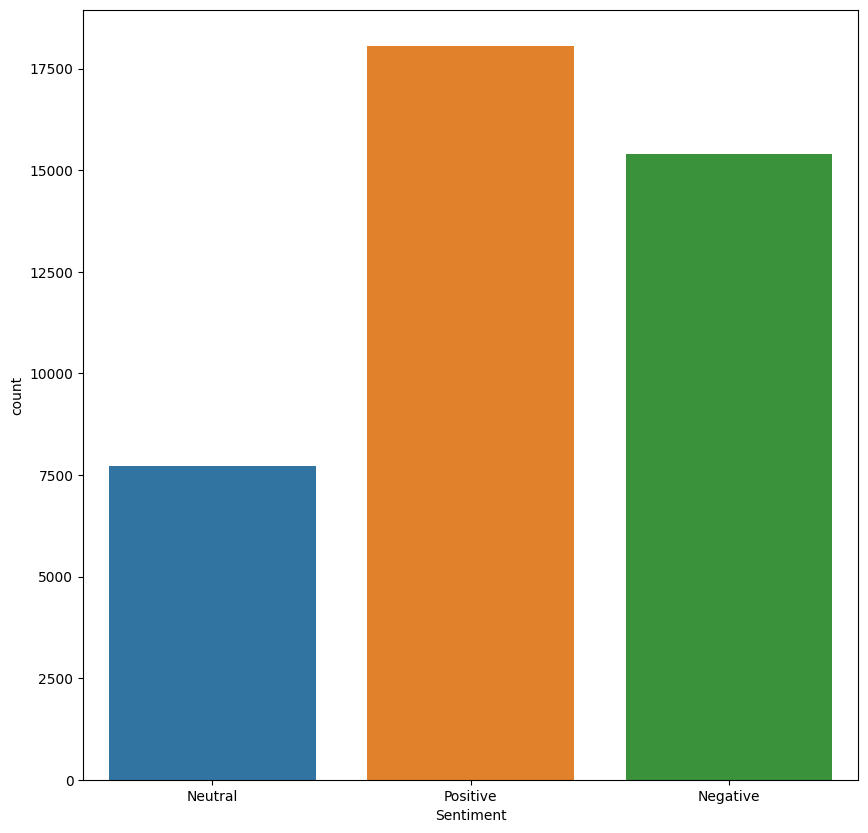

In [20]:
#Plotting the total number of tweets for each subcategory in the target variable after the transformation
plt.rcParams["figure.figsize"]=10,10
sns.countplot(x="Sentiment", data=df)

In [21]:
df['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

Locations Analysis

Let us find out top 10 locations of tweet

In [22]:
#Number of tweets in each location
Location_df = df['Location'].value_counts().rename_axis('Location').reset_index(name='Count')
Location_df

,Location,Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
...,...,...
12215,Staffordshire Moorlands,1
12216,Kithchener ON,1
12217,"Tulsa, Ok",1
12218,"Watford, South Oxhey, Bushey",1


In [23]:
#top locations of tweet
Location_df.head(10)

,Location,Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


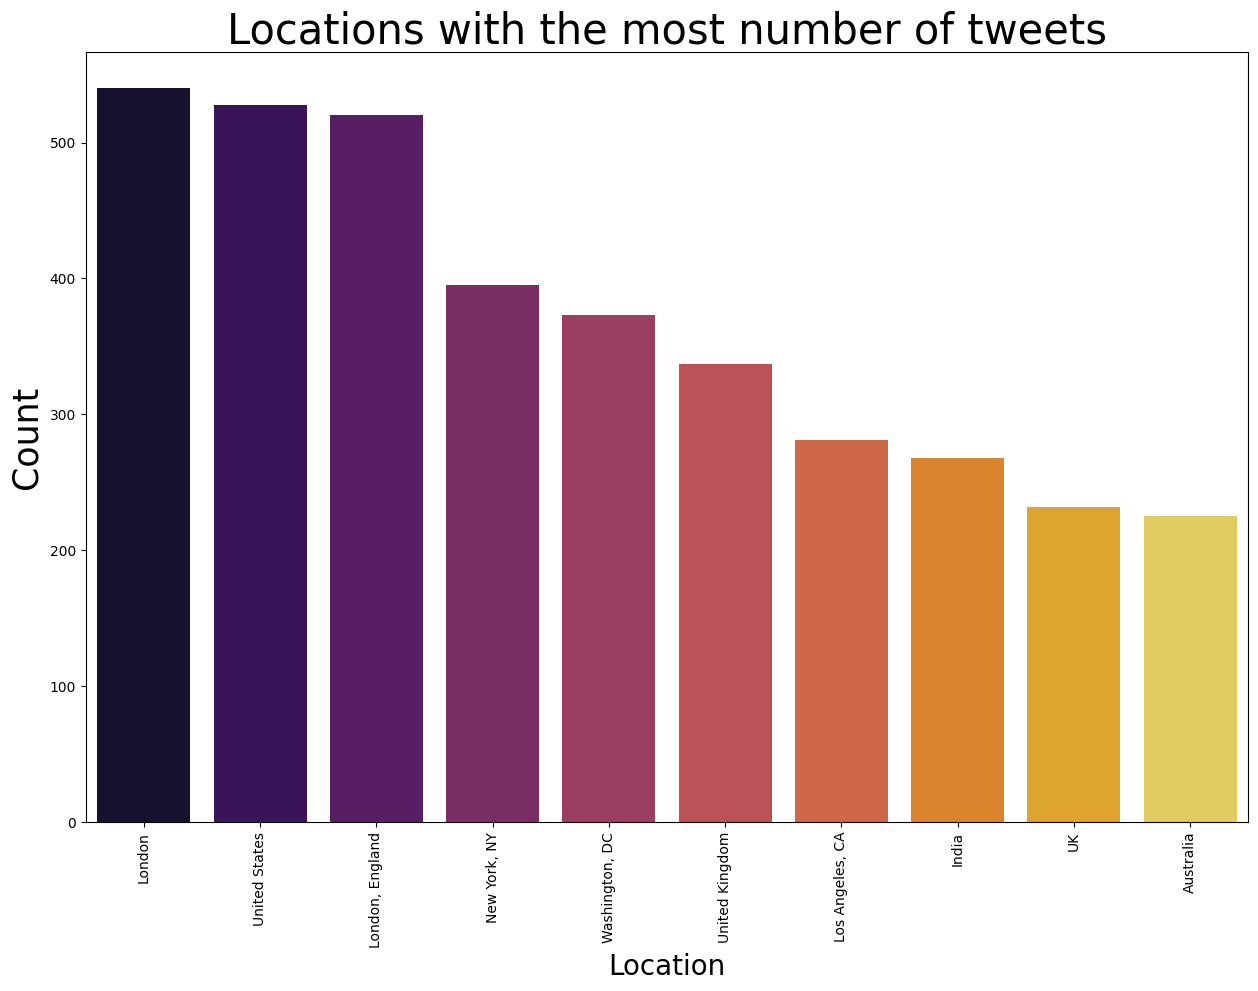

In [25]:


plt.rcParams["figure.figsize"]=(15,10)
sns.barplot(x=Location_df['Location'][0:10], y=Location_df['Count'][0:10], palette='inferno')
plt.xticks(rotation=90)
plt.title('Locations with the most number of tweets', fontsize=30)
plt.xlabel('Location', fontsize=20)
plt.ylabel('Count', fontsize=25)
plt.show()


Most of the tweets are from United States, London and New York

Date Analysis

In [26]:
#Converting the TweetAt column to a datetime object
df["TweetAt"] = pd.to_datetime(df["TweetAt"])

In [27]:
#Obtaining the time period of the dataset
print("Our dataset contains tweets from {}th {} {} to {}th {} {}".format(df["TweetAt"].min().day, df["TweetAt"].min().month_name(), df["TweetAt"].min().year,
         df["TweetAt"].max().day, df["TweetAt"].max().month_name(), df["TweetAt"].max().year))

Our dataset contains tweets from 4th January 2020 to 4th December 2020


In [28]:
#Creating new column for day and month from date colum "TweetAt"
df['day'] = pd.DatetimeIndex(df['TweetAt']).day
df['month'] = pd.DatetimeIndex(df['TweetAt']).month
#Creating a column containing name of the weekday
df["week day"]=pd.DatetimeIndex(df['TweetAt']).day_name()

In [29]:
#Checking the top 5 row of our dataset
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,day,month,week day
0,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,16,3,Monday
1,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,16,3,Monday
2,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,16,3,Monday
3,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,16,3,Monday
4,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,16,3,Monday


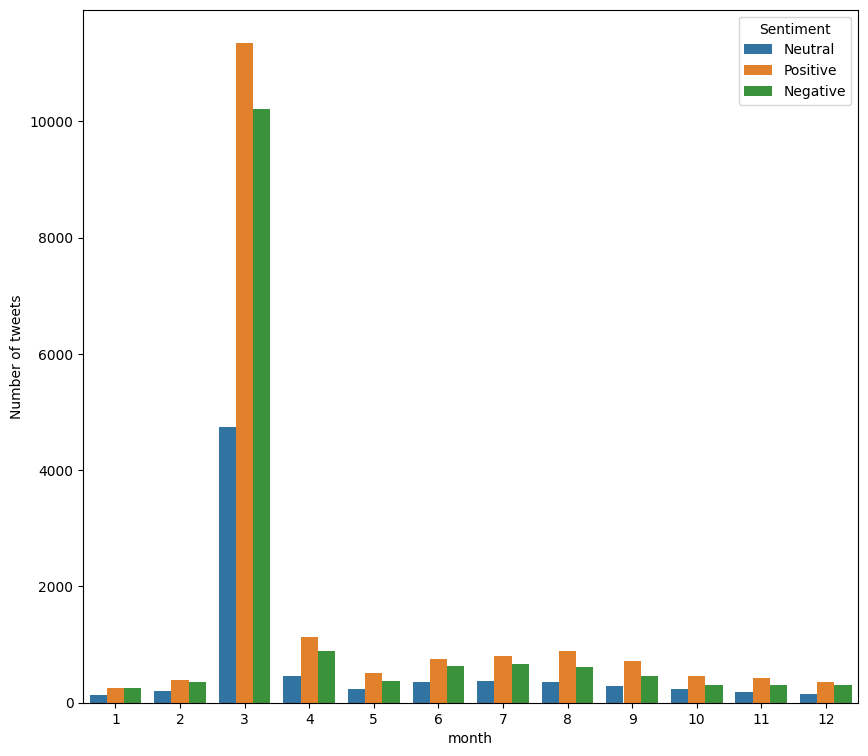

In [30]:
#Plotting total number of tweets for each sentiment over the months
plt.rcParams["figure.figsize"]=(10,9)
ax = sns.countplot(x="month", hue="Sentiment", data=df)
plt.ylabel("Number of tweets")
plt.show()

It is clear the most number of tweets was created in the month of March.

Let's analyze the tweet count on a daily basis in the month of March

Text(0, 0.5, 'Number of tweets')

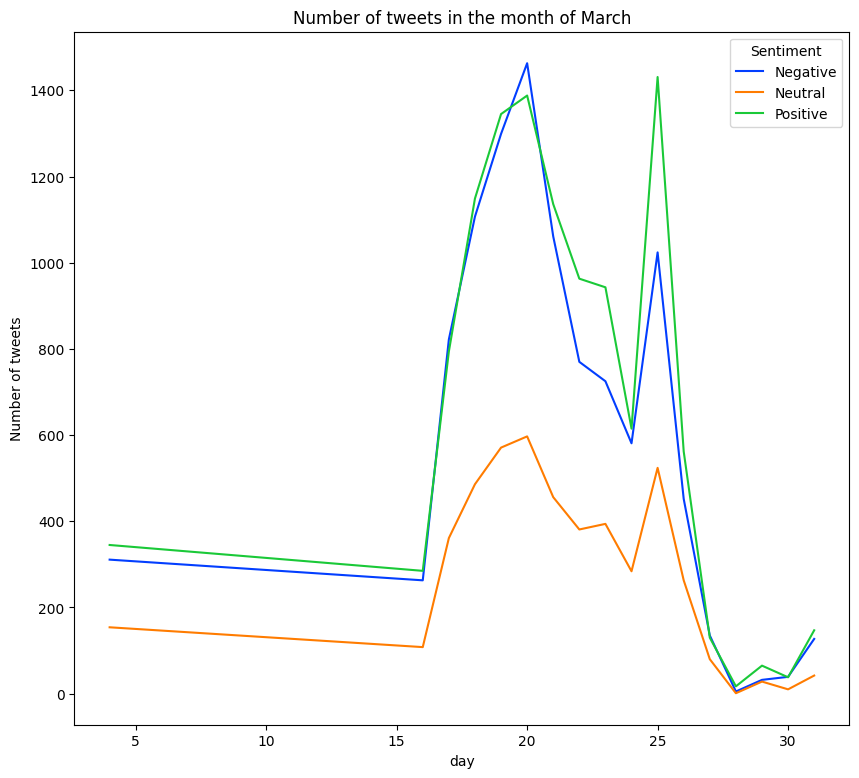

In [31]:
#Creating a subset of our dataframe that will only contains tweets from the month of march
day_analysis = df[df["month"] == 3].copy()
#Grouping our dataset on the basis of Day and sentiment to get the number of tweets tweeted on each day in the month of march belonging to each sentiment
daySentiment_groupby = day_analysis.groupby(["day" , "Sentiment"]).agg({ "OriginalTweet" : "count"}).reset_index()
sns.lineplot(x = "day" , y ="OriginalTweet" , hue="Sentiment" ,  data = daySentiment_groupby , palette = 'bright' )
plt.title("Number of tweets in the month of March")
plt.ylabel("Number of tweets")

Let's check out the day when people tweet the most.

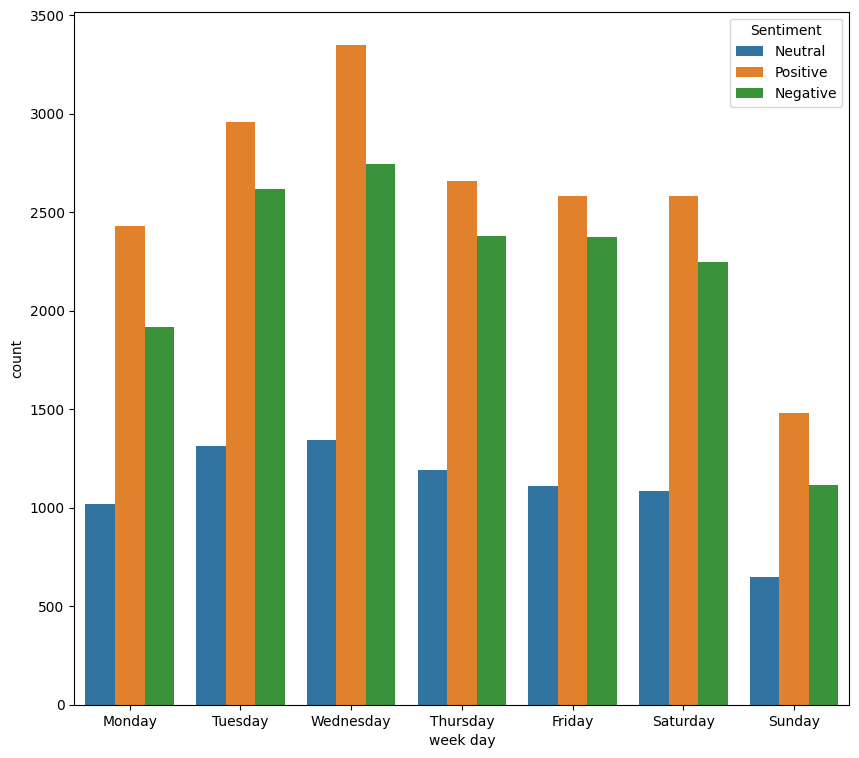

In [32]:
#Checking the day on which more tweets are being created
ax = sns.countplot(x="week day", hue="Sentiment", data=df)

Tweet length analysis

Lets us try to get insights regarding tweet length.

In [33]:
#Creating a new column 'length' by calculating the length of tweets
df['length']=df['OriginalTweet'].apply(len)
df.head()

,Location,TweetAt,OriginalTweet,Sentiment,day,month,week day,length
0,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,16,3,Monday,111
1,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,16,3,Monday,237
2,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,16,3,Monday,131
3,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,16,3,Monday,306
4,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,16,3,Monday,310


<Axes: ylabel='Frequency'>

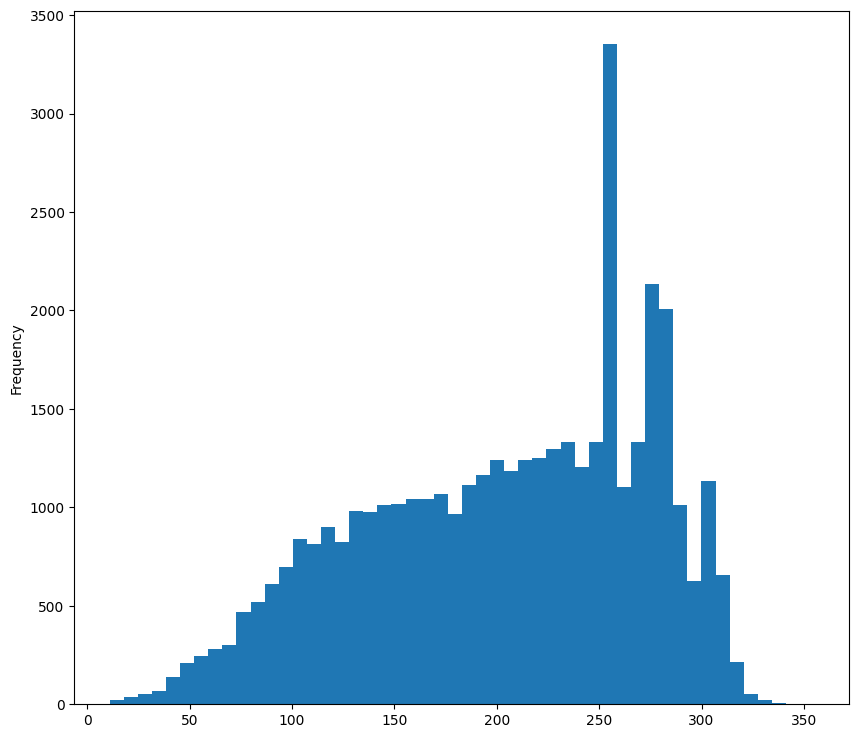

In [34]:
#Checking distribution of length of tweets
df['length'].plot(bins=50,kind='hist')

In [35]:
def show_dist(df, col):

  '''Function is to show distribution of any particular column for each of the different sentiment'''

  bins = np.arange(df[col].min(), df[col].max() + 1)
  g = sns.FacetGrid(df, col='Sentiment', height=5, hue='Sentiment', palette="bright")
  g = g.map(sns.histplot, col, kde=False, bins=bins)

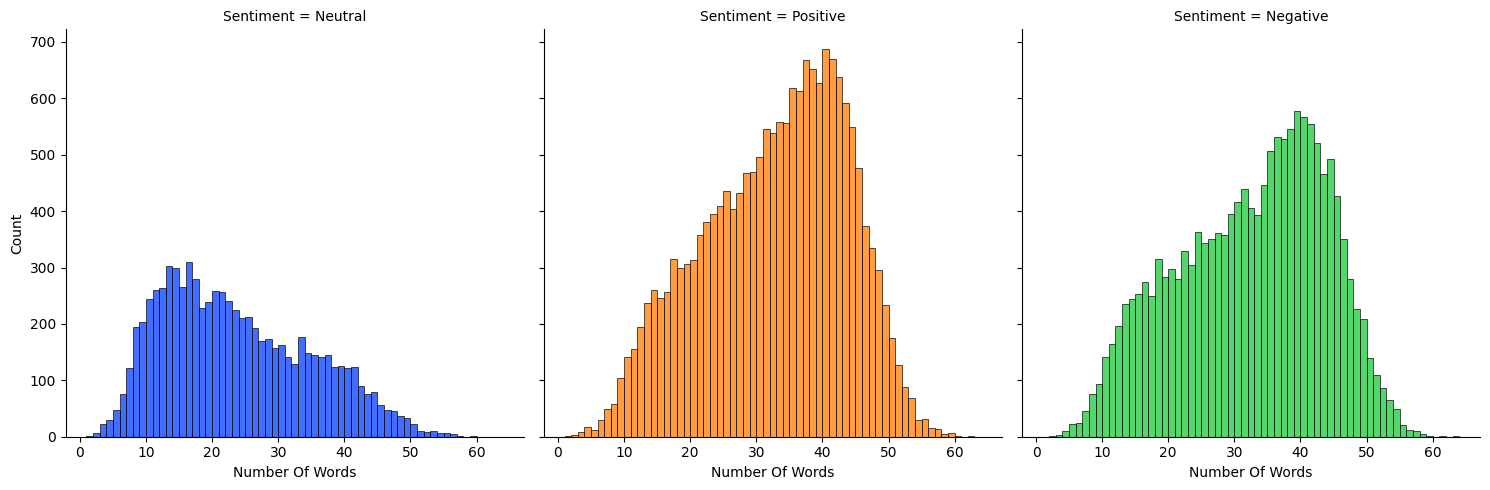

In [36]:
#Creating a new column named "Number Of Words" to store the number of words in each tweet
df["Number Of Words"] = df["OriginalTweet"].str.split().apply(len)

show_dist(df , 'Number Of Words')

The number of words present in tweets of neutral sentiment is far less when compared to tweets with a positive or negative sentiment . Most of the positive and negative sentiment tweets contain almost 40 words on average.

In [38]:
import re

df["Number Of Mentions"] = df["OriginalTweet"].apply(lambda tweet: len(re.findall(r'@[^\s]+', tweet)))




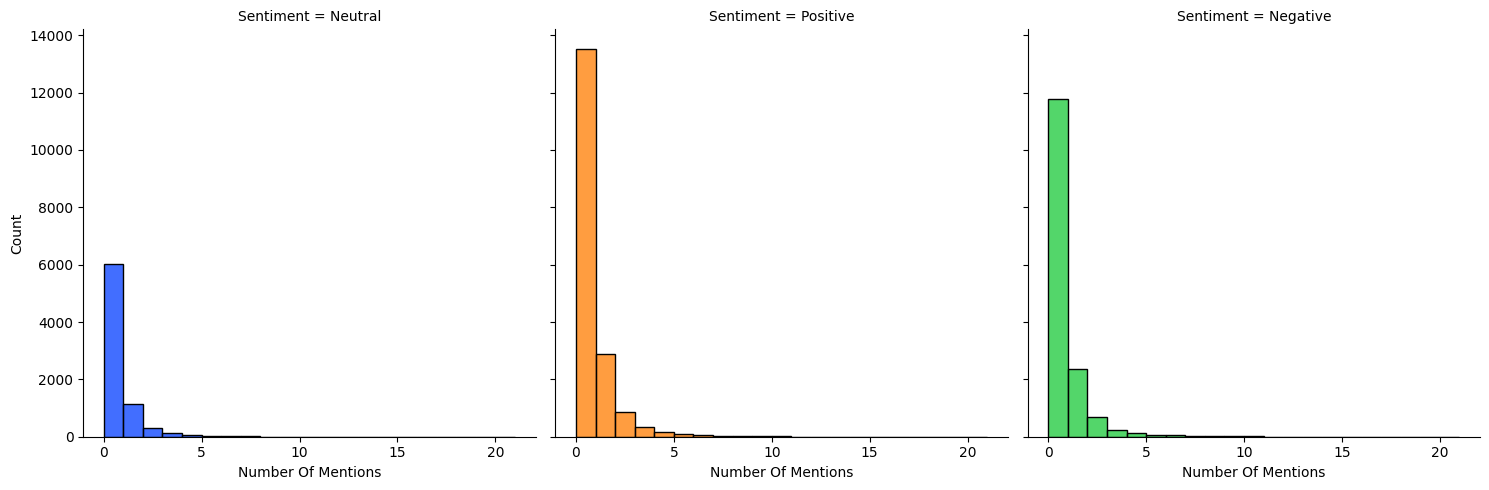

In [39]:
show_dist(df, "Number Of Mentions")

Most of the tweets contain no mention and there is no particular relationship between number of mentions and regard the sentiment.

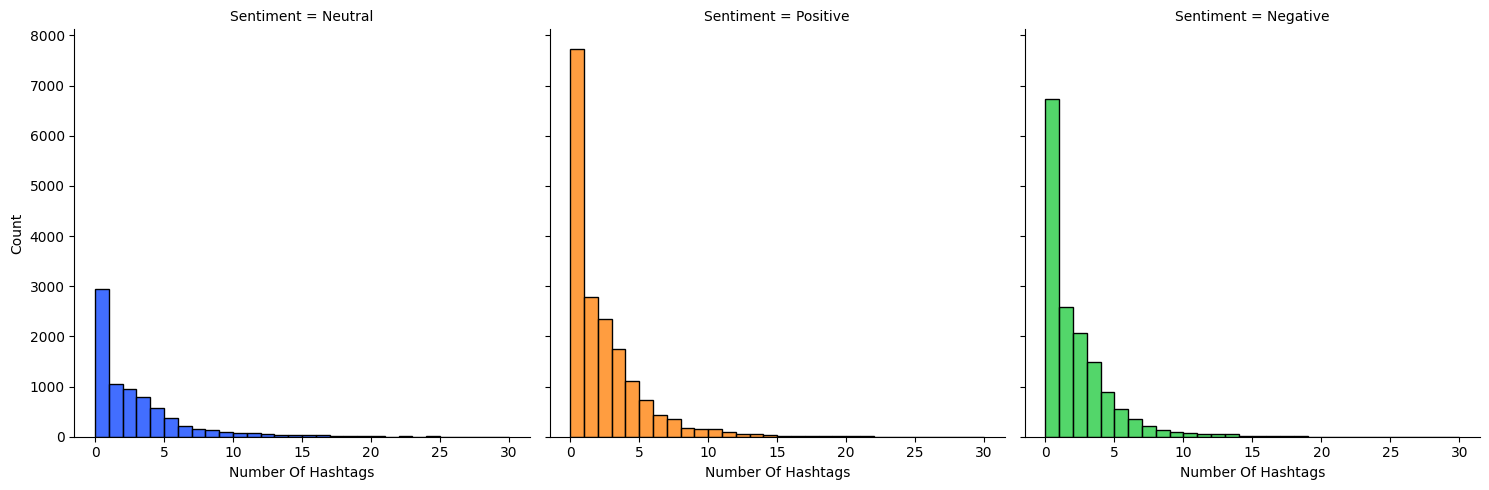

In [40]:
#Creating a new columns named "Number Of Hashtags" to store the number of hastags in each tweet
df["Number Of Hashtags"] = df["OriginalTweet"].apply(lambda tweet : len(re.findall(r'#[^\s]+', tweet)))

show_dist(df, "Number Of Hashtags")

Most of the tweets do not contain a hashtag. Again, the number of hashtags has nothing to do with the sentiment.

Extract hashtags

Let's now try to understand the impact of hashtags on tweets sentiment

In [41]:
def extract_hash_tags(s):
  return [part[1:] for part in s.split() if part.startswith('#')]
df['hashtags']=df['OriginalTweet'].apply(extract_hash_tags)

In [43]:
from collections import Counter

In [44]:
d = Counter(df['hashtags'].sum())
hashtags = pd.DataFrame(list(d.items()), columns=['Hashtag', 'Count'])

In [46]:
#Sorting the hashtags based on their count
hashtags.sort_values(by='Count',ascending=False,inplace=True)

In [47]:
#Checking the dataframe
hashtags

,Hashtag,Count
3,coronavirus,12224
2,COVID19,3204
10,Covid_19,2469
53,Coronavirus,2068
26,COVID2019,1588
...,...,...
8504,WhoDidThis,1
8505,expensive,1
8507,PTCares,1
8508,vlogger,1


In [50]:
import plotly.graph_objs as go

data = {
   "values": hashtags['Count'][:10],
   "labels": hashtags["Hashtag"][:10],  # Corrected column name to "Hashtag"
   "domain": {"column": 0},
   "name": "hashtags",
   "hoverinfo": "label+percent+name",
   "hole": 0.4,
   "type": "pie"
}

# Providing title for the plot
layout = go.Layout(title="<b>Relative Percentage of Top 10 Hashtags</b>", legend=dict(x=0.9, y=0.8, orientation="v"))

# Plotting
fig = go.Figure(data=[data], layout=layout)
fig.update_layout(title_x=0.5)
fig.show()


"Coronavirus" is the most used hashtag.

Let's create a word cloud to visualize the hashtags

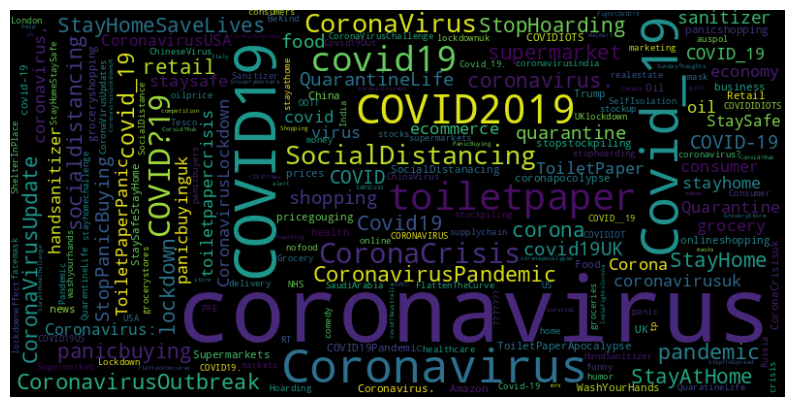

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = dict(zip(hashtags['Hashtag'].tolist(), hashtags['Count'].tolist()))  # Corrected column name to "Hashtag"

# Generate word cloud of hashtags based on their frequency
wc = WordCloud(width=800, height=400, max_words=200, background_color='black').generate_from_frequencies(data)

# Providing figure size
plt.figure(figsize=(10, 10))

# Plotting
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [53]:
df.head()


,Location,TweetAt,OriginalTweet,Sentiment,day,month,week day,length,Number Of Words,Number Of Mentions,Number Of Hashtags,hashtags
0,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,16,3,Monday,111,8,3,0,[]
1,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,16,3,Monday,237,38,0,0,[]
2,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,16,3,Monday,131,14,0,0,[]
3,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,16,3,Monday,306,42,0,7,"[COVID19france, COVID_19, COVID19, coronavirus..."
4,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,16,3,Monday,310,40,0,6,"[COVID19, coronavirus, CoronavirusFrance, rest..."
